# EDA

In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

# JSONL 파일 경로
train_file_path = "../resource/data/nikluge-ea-2023-train.jsonl"
dev_file_path = "../resource/data/nikluge-ea-2023-dev.jsonl"
test_file_path = "../resource/data/nikluge-ea-2023-test.jsonl"
predict_file_path = "../outputs/ensemble(32+5+17).jsonl"

In [2]:
# JSONL 파일을 줄 단위로 읽어서 각 줄을 딕셔너리로 변환하고, 이를 리스트에 추가합니다.
data = []
with open(train_file_path, 'r') as f:
    for line in f:
        json_line = json.loads(line)
        row = {}
        row['id'] = json_line['id']
        row['input'] = json_line['input']['form']
        row['target'] = json_line['input']['target']['form']
        row['span_begin'] = json_line['input']['target']['begin']
        row['span_end'] = json_line['input']['target']['end']
        
       # Output dictionary에서 감정 값을 추출하여 row에 추가합니다.
        for emotion, value in json_line['output'].items():
            row[emotion] = value
        
        data.append(row)

# 리스트를 DataFrame으로 변환합니다.
train_df = pd.DataFrame(data)

In [3]:
# JSONL 파일을 줄 단위로 읽어서 각 줄을 딕셔너리로 변환하고, 이를 리스트에 추가합니다.
data = []
with open(dev_file_path, 'r') as f:
    for line in f:
        json_line = json.loads(line)
        row = {}
        row['id'] = json_line['id']
        row['input'] = json_line['input']['form']
        row['target'] = json_line['input']['target']['form']
        row['span_begin'] = json_line['input']['target']['begin']
        row['span_end'] = json_line['input']['target']['end']
        
       # Output dictionary에서 감정 값을 추출하여 row에 추가합니다.
        for emotion, value in json_line['output'].items():
            row[emotion] = value
        
        data.append(row)

# 리스트를 DataFrame으로 변환합니다.
dev_df = pd.DataFrame(data)

In [4]:
# JSONL 파일을 줄 단위로 읽어서 각 줄을 딕셔너리로 변환하고, 이를 리스트에 추가합니다.
data = []
with open(test_file_path, 'r') as f:
    for line in f:
        json_line = json.loads(line)
        row = {}
        row['id'] = json_line['id']
        row['input'] = json_line['input']['form']
        row['target'] = json_line['input']['target']['form']
        row['span_begin'] = json_line['input']['target']['begin']
        row['span_end'] = json_line['input']['target']['end']
        
        data.append(row)

# 리스트를 DataFrame으로 변환합니다.
test_df = pd.DataFrame(data)

In [5]:
# JSONL 파일을 줄 단위로 읽어서 각 줄을 딕셔너리로 변환하고, 이를 리스트에 추가합니다.
data = []
with open(predict_file_path, 'r') as f:
    for line in f:
        json_line = json.loads(line)
        row = {}
        row['id'] = json_line['id']
        row['input'] = json_line['input']['form']
        row['target'] = json_line['input']['target']['form']
        row['span_begin'] = json_line['input']['target']['begin']
        row['span_end'] = json_line['input']['target']['end']
        
       # Output dictionary에서 감정 값을 추출하여 row에 추가합니다.
        for emotion, value in json_line['output'].items():
            row[emotion] = value
        
        data.append(row)

# 리스트를 DataFrame으로 변환합니다.
pred_df = pd.DataFrame(data)

## 문자열 길이 분석

### train set의 input 문자열 길이 정보

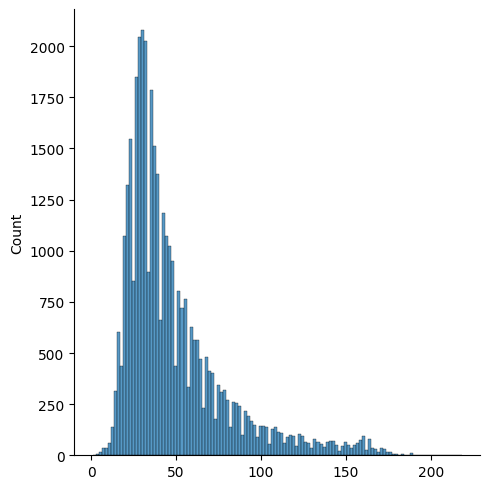

In [6]:
train_input_lengths = [len(t) for t in train_df["input"]]
sns.displot(train_input_lengths)

### train set의 target 문자열 길이 정보

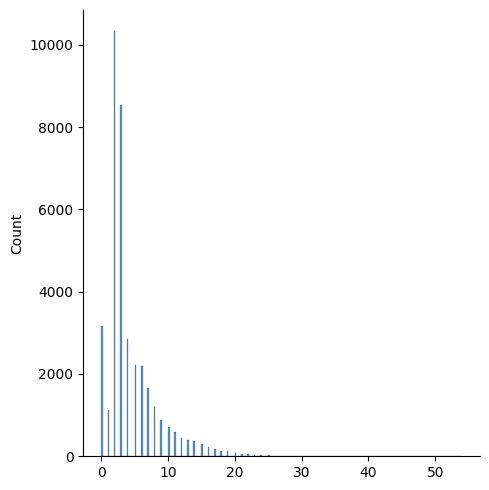

In [7]:
train_target = train_df["target"].fillna("")
train_target_lengths = [len(t) for t in train_target]
sns.displot(train_target_lengths)

### dev set의 input 문자열 길이 정보

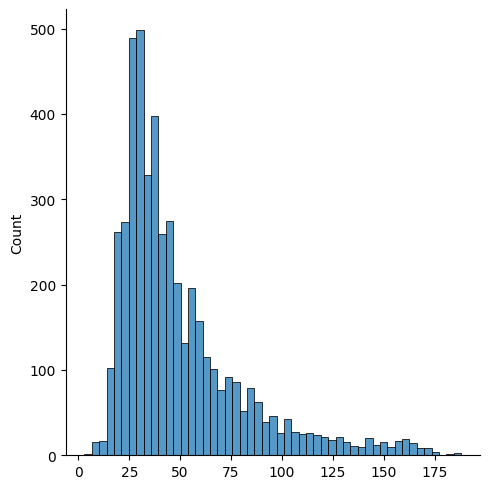

In [8]:
dev_input_lengths = [len(t) for t in dev_df["input"]]
sns.displot(dev_input_lengths)

### dev set의 target 문자열 길이 정보

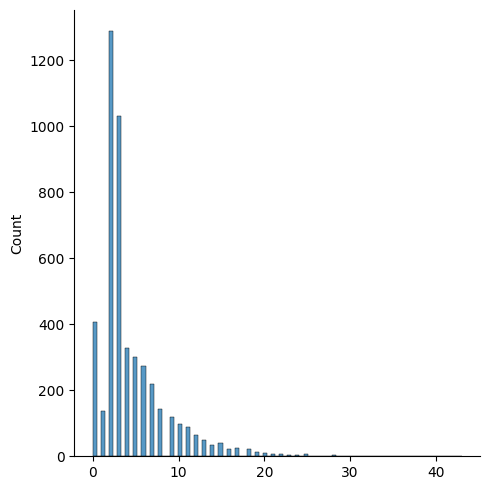

In [9]:
dev_target = dev_df["target"].fillna("")
dev_target_lengths = [len(t) for t in dev_target]
sns.displot(dev_target_lengths)

### test set의 input 문자열 길이 정보

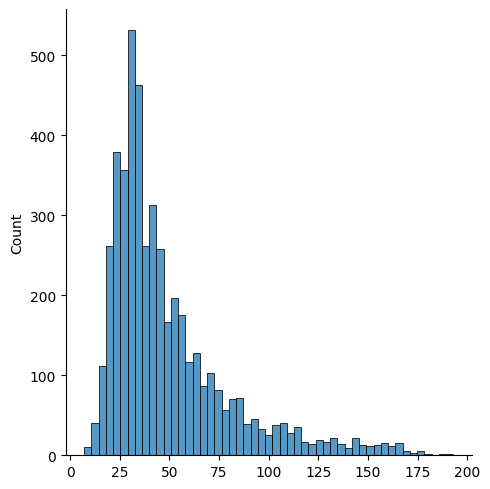

In [10]:
test_input_lengths = [len(t) for t in test_df["input"]]
sns.displot(test_input_lengths)

### test set의 target 문자열 길이 정보

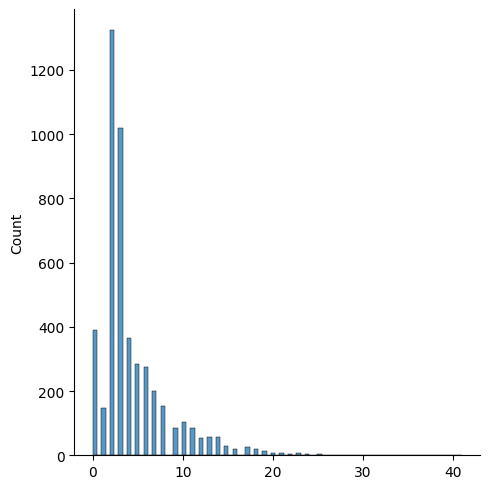

In [11]:
test_target = test_df["target"].fillna("")
test_target_lengths = [len(t) for t in test_target]
sns.displot(test_target_lengths)

## 감정 라벨 정보

In [12]:
emotion_cols = ['joy', 'anticipation', 'trust', 'surprise', 'disgust', 'fear', 'anger', 'sadness']

In [13]:
# 문자열을 불리언으로 변환합니다.
for col in emotion_cols:
    train_df[col] = train_df[col] == 'True'
    dev_df[col] = dev_df[col] == 'True'   
    pred_df[col] = pred_df[col] == 'True'   

### 감정 별 발생률 그래프

#### train

joy             0.561900
anticipation    0.244464
trust           0.058209
surprise        0.068992
disgust         0.039993
fear            0.022171
anger           0.042576
sadness         0.065380
dtype: float64


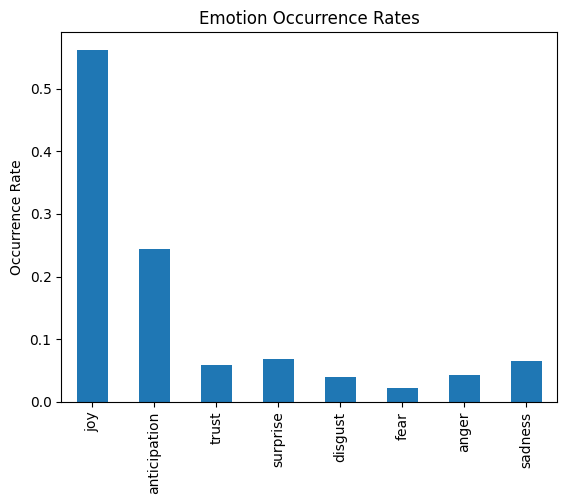

In [14]:
# 1. 각각의 감정에 대한 발생률을 계산하고 그래프로 나타냅니다.
emotion_counts = train_df[emotion_cols].mean()
emotion_counts.plot(kind='bar')
plt.title('Emotion Occurrence Rates')
plt.ylabel('Occurrence Rate')
print(emotion_counts)
plt.show()

#### dev

joy             0.565776
anticipation    0.226900
trust           0.055357
surprise        0.071985
disgust         0.040413
fear            0.021259
anger           0.044201
sadness         0.069038
dtype: float64


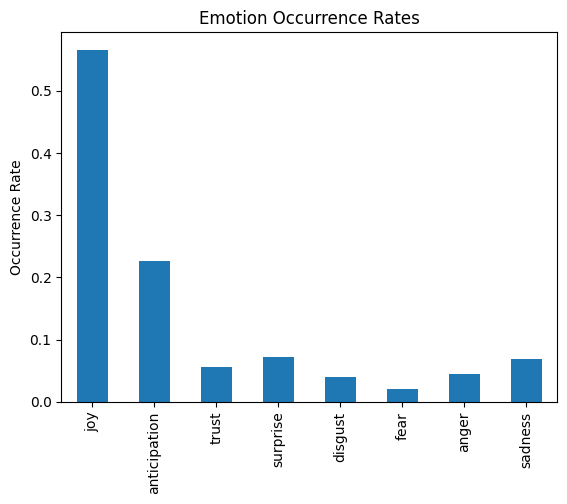

In [15]:
# 1. 각각의 감정에 대한 발생률을 계산하고 그래프로 나타냅니다.
emotion_counts = dev_df[emotion_cols].mean()
emotion_counts.plot(kind='bar')
plt.title('Emotion Occurrence Rates')
plt.ylabel('Occurrence Rate')
print(emotion_counts)
plt.show()

#### predict_file

joy             0.579823
anticipation    0.235889
trust           0.039596
surprise        0.071820
disgust         0.039806
fear            0.016428
anger           0.038753
sadness         0.061500
dtype: float64


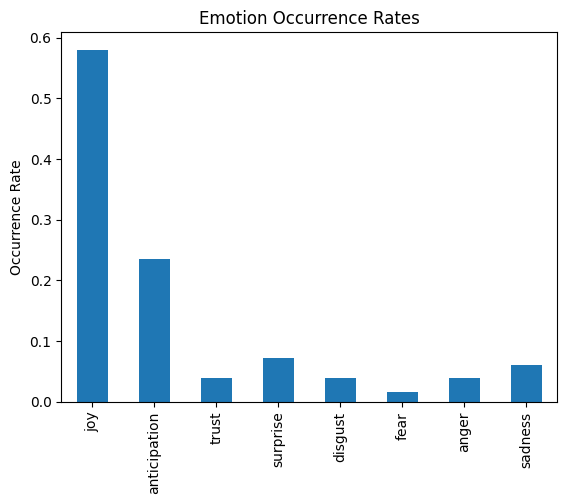

In [16]:
# 1. 각각의 감정에 대한 발생률을 계산하고 그래프로 나타냅니다.
emotion_counts = pred_df[emotion_cols].mean()
emotion_counts.plot(kind='bar')
plt.title('Emotion Occurrence Rates')
plt.ylabel('Occurrence Rate')
print(emotion_counts)
plt.show()

In [17]:
emotion_counts

joy             0.579823
anticipation    0.235889
trust           0.039596
surprise        0.071820
disgust         0.039806
fear            0.016428
anger           0.038753
sadness         0.061500
dtype: float64

### 데이터 별 라벨링 된 감정 수

#### train

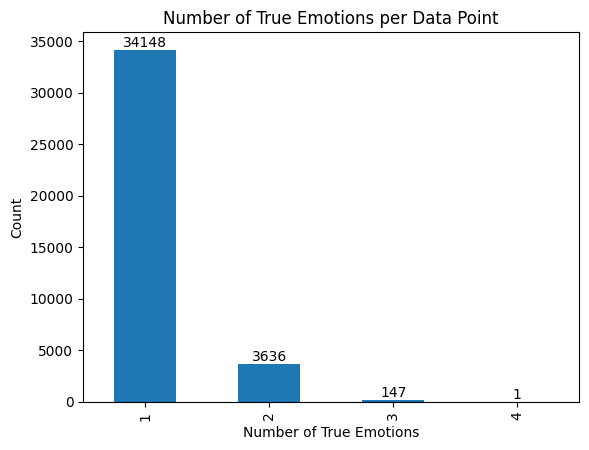

In [18]:
# 2. 각 데이터 별 True인 감정의 개수를 계산하고 그래프로 나타냅니다.
train_df['num_true_emotions'] = train_df[emotion_cols].sum(axis=1)
counts = train_df['num_true_emotions'].value_counts().sort_index()
ax = counts.plot(kind='bar')

# 막대 위에 count 값을 표시합니다.
for i in range(len(counts)):
    ax.text(i, counts.iloc[i], str(counts.iloc[i]), ha='center', va='bottom')

plt.title('Number of True Emotions per Data Point')
plt.xlabel('Number of True Emotions')
plt.ylabel('Count')
plt.show()

#### dev

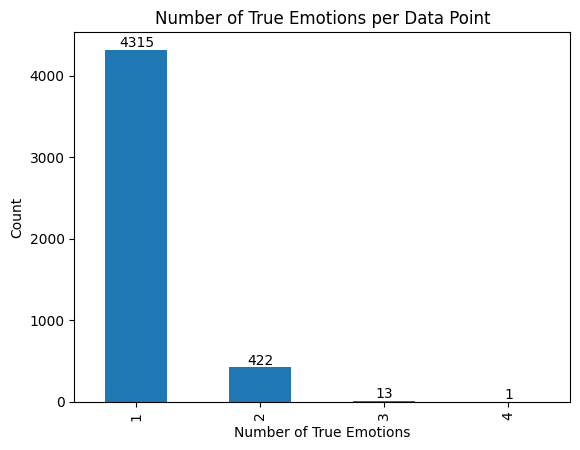

In [19]:
# 2. 각 데이터 별 True인 감정의 개수를 계산하고 그래프로 나타냅니다.
dev_df['num_true_emotions'] = dev_df[emotion_cols].sum(axis=1)
counts = dev_df['num_true_emotions'].value_counts().sort_index()
ax = counts.plot(kind='bar')

# 막대 위에 count 값을 표시합니다.
for i in range(len(counts)):
    ax.text(i, counts.iloc[i], str(counts.iloc[i]), ha='center', va='bottom')

plt.title('Number of True Emotions per Data Point')
plt.xlabel('Number of True Emotions')
plt.ylabel('Count')
plt.show()

#### predict_file

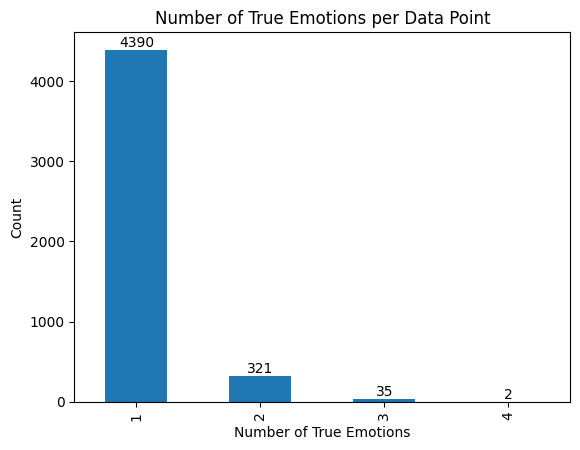

In [20]:
# 2. 각 데이터 별 True인 감정의 개수를 계산하고 그래프로 나타냅니다.
pred_df['num_true_emotions'] = pred_df[emotion_cols].sum(axis=1)
counts = pred_df['num_true_emotions'].value_counts().sort_index()
ax = counts.plot(kind='bar')

# 막대 위에 count 값을 표시합니다.
for i in range(len(counts)):
    ax.text(i, counts.iloc[i], str(counts.iloc[i]), ha='center', va='bottom')

plt.title('Number of True Emotions per Data Point')
plt.xlabel('Number of True Emotions')
plt.ylabel('Count')
plt.show()